<a href="https://colab.research.google.com/github/Afnaan-Alqadree/ai-ml-projects/blob/main/Data_Mining_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Generate a 2D dataset with NaN values

In [ ]:
np.random.seed(42)
num_samples, num_features = 50, 5
data = np.random.randint(1, 100, size=(num_samples, num_features)).astype(float)

# Convert to DataFrame for better visualization
df = pd.DataFrame(data, columns=[f"Feature_{i+1}" for i in range(num_features)])

# Display the dataset
print("Generated 2D Dataset (First 5 Rows):")
print(df.head())

Generated 2D Dataset (First 5 Rows):
   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5
0       52.0       93.0       15.0       72.0       61.0
1       21.0       83.0       87.0       75.0       75.0
2       88.0       24.0        3.0       22.0       53.0
3        2.0       88.0       30.0       38.0        2.0
4       64.0       60.0       21.0       33.0       76.0


# Introduce NaN values randomly

In [ ]:
nan_indices = np.random.choice(num_samples * num_features, size=50, replace=False)

# Flatten the dataset and replace selected indices with NaN
data_flat = data.flatten()
for idx in nan_indices:
    data_flat[idx] = np.nan

# Reshape the dataset back to its original shape
data_with_nan = data_flat.reshape(num_samples, num_features)

# Convert back to DataFrame for better visualization
df_with_nan = pd.DataFrame(data_with_nan, columns=[f"Feature_{i+1}" for i in range(num_features)])

# Display the dataset with NaN values
print("Dataset with NaN values (First 10 Rows):")
print(df_with_nan.head(10))


Dataset with NaN values (First 10 Rows):
   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5
0       52.0       93.0       15.0       72.0       61.0
1       21.0        NaN       87.0       75.0       75.0
2       88.0       24.0        3.0       22.0       53.0
3        NaN       88.0       30.0       38.0        2.0
4       64.0        NaN       21.0        NaN       76.0
5       58.0        NaN       89.0       49.0        NaN
6       59.0        NaN       92.0       60.0       80.0
7        NaN       62.0       62.0       47.0       62.0
8       51.0       55.0       64.0        3.0       51.0
9        7.0       21.0       73.0       39.0       18.0


# Add a target column (binary classification)

In [ ]:
target = np.random.choice([0, 1], size=num_samples)
df = pd.DataFrame(data_with_nan, columns=[f"Feature_{i+1}" for i in range(num_features)])
df["Target"] = target

# Display the dataset with the target column
print("Dataset with NaN values and Target Column (First 10 Rows):")
print(df.head(10))
print("\nNumber of NaN values remaining in the dataset:", df.isna().sum().sum())

Dataset with NaN values and Target Column (First 10 Rows):
   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Target
0       52.0       93.0       15.0       72.0       61.0       0
1       21.0        NaN       87.0       75.0       75.0       0
2       88.0       24.0        3.0       22.0       53.0       0
3        NaN       88.0       30.0       38.0        2.0       1
4       64.0        NaN       21.0        NaN       76.0       1
5       58.0        NaN       89.0       49.0        NaN       1
6       59.0        NaN       92.0       60.0       80.0       0
7        NaN       62.0       62.0       47.0       62.0       1
8       51.0       55.0       64.0        3.0       51.0       1
9        7.0       21.0       73.0       39.0       18.0       1

Number of NaN values remaining in the dataset: 50


# Step 2: Handle NaN values by replacing them with the mean of the column

In [ ]:
df.fillna(df.mean(), inplace=True)

# Display the updated dataset
print("Dataset After Replacing NaN with Column Means (First 10 Rows):")
print(df.head(10))

# Verify if any NaN values remain
print("\nNumber of NaN values remaining in the dataset:", df.isna().sum().sum())

Dataset After Replacing NaN with Column Means (First 10 Rows):
   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Target
0  46.684211  93.000000       15.0  72.000000  61.000000       1
1  21.000000  83.000000       87.0  75.000000  53.285714       1
2  88.000000  55.317073        3.0  22.000000  53.000000       1
3   2.000000  88.000000       30.0  36.230769   2.000000       1
4  64.000000  60.000000       21.0  33.000000  76.000000       0
5  58.000000  22.000000       89.0  36.230769  91.000000       1
6  46.684211  42.000000       92.0  36.230769  80.000000       1
7  15.000000  62.000000       62.0  47.000000  53.285714       1
8  46.684211  55.000000       64.0   3.000000  51.000000       1
9   7.000000  21.000000       73.0  39.000000  18.000000       1

Number of NaN values remaining in the dataset: 0


# Step 3: Split the dataset into features (X) and target (y)

In [ ]:
X = df.drop("Target", axis=1)  # Features
y = df["Target"]              # Target

# Display the first few rows of the features (X)
print("Features (X) - First 5 Rows:")
print(X.head())

# Display the first few values of the target (y)
print("\nTarget (y) - First 10 Values:")
print(y.head(10).to_list())

Features (X) - First 5 Rows:
   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5
0  46.684211  93.000000       15.0  72.000000  61.000000
1  21.000000  83.000000       87.0  75.000000  53.285714
2  88.000000  55.317073        3.0  22.000000  53.000000
3   2.000000  88.000000       30.0  36.230769   2.000000
4  64.000000  60.000000       21.0  33.000000  76.000000

Target (y) - First 10 Values:
[1, 1, 1, 1, 0, 1, 1, 1, 1, 1]


# Step 4: Split into training and testing sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print("Training Features (X_train) Shape:", X_train.shape)
print("Testing Features (X_test) Shape:", X_test.shape)
print("Training Target (y_train) Shape:", y_train.shape)
print("Testing Target (y_test) Shape:", y_test.shape)

# Optionally, display a few rows from the training set for verification
print("\nFirst 5 Rows of Training Features (X_train):")
print(X_train.head())
print("\nFirst 5 Values of Training Target (y_train):")
print(y_train.head().to_list())

Training Features (X_train) Shape: (40, 5)
Testing Features (X_test) Shape: (10, 5)
Training Target (y_train) Shape: (40,)
Testing Target (y_test) Shape: (10,)

First 5 Rows of Training Features (X_train):
    Feature_1  Feature_2  Feature_3  Feature_4  Feature_5
12  60.000000       71.0       44.0  36.230769  47.000000
4   64.000000       60.0       21.0  33.000000  76.000000
37  75.000000       92.0       89.0  36.230769  53.285714
8   46.684211       55.0       64.0   3.000000  51.000000
3    2.000000       88.0       30.0  36.230769   2.000000

First 5 Values of Training Target (y_train):
[1, 0, 1, 1, 1]


# Step 5: Apply SVM

In [ ]:
sm = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = sm.fit_resample(X_train, y_train)

# Train with RBF kernel
svm_model = SVC(kernel="rbf", random_state=42)
svm_model.fit(X_train_balanced, y_train_balanced)

# Predict and evaluate
y_pred_svm = svm_model.predict(X_test)
print("Confusion Matrix for SVM (RBF Kernel):")
print(confusion_matrix(y_test, y_pred_svm))
print("\nClassification Report for SVM (RBF Kernel):")
print(classification_report(y_test, y_pred_svm))

Confusion Matrix for SVM (RBF Kernel):
[[1 4]
 [2 3]]

Classification Report for SVM (RBF Kernel):
              precision    recall  f1-score   support

           0       0.33      0.20      0.25         5
           1       0.43      0.60      0.50         5

    accuracy                           0.40        10
   macro avg       0.38      0.40      0.38        10
weighted avg       0.38      0.40      0.38        10



# Step 6: Apply KNN

In [ ]:
sm = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = sm.fit_resample(X_train, y_train)

# Scale features for KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)

# Train KNN with k=3
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_scaled, y_train_balanced)

# Predict and evaluate
y_pred_knn = knn_model.predict(X_test_scaled)
print("Confusion Matrix for KNN:")
print(confusion_matrix(y_test, y_pred_knn))
print("\nClassification Report for KNN:")
print(classification_report(y_test, y_pred_knn))

Confusion Matrix for KNN:
[[1 4]
 [2 3]]

Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.33      0.20      0.25         5
           1       0.43      0.60      0.50         5

    accuracy                           0.40        10
   macro avg       0.38      0.40      0.38        10
weighted avg       0.38      0.40      0.38        10



# Step 7: Evaluate and display confusion matrices

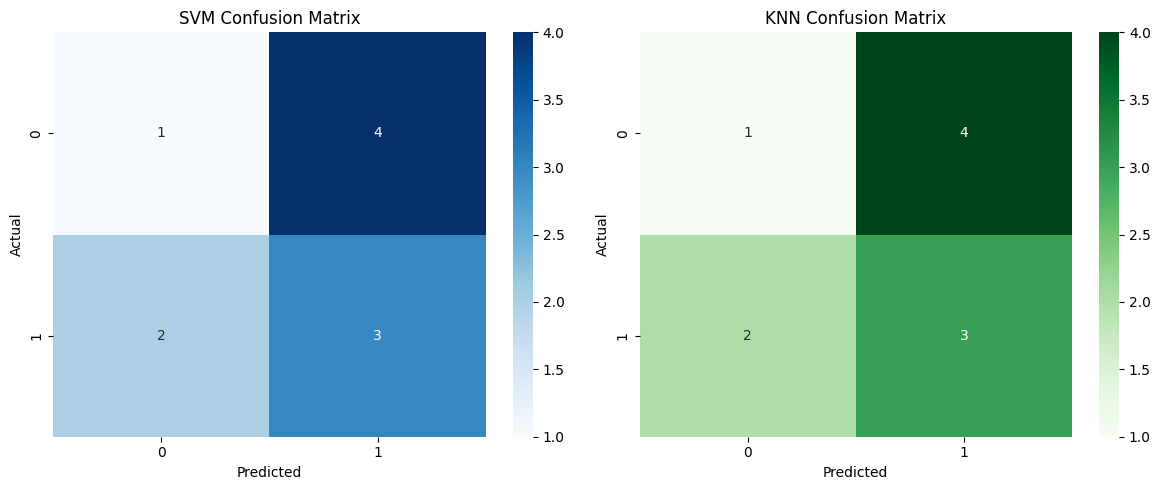

In [ ]:
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Display confusion matrices with heatmaps
plt.figure(figsize=(12, 5))

# SVM Confusion Matrix
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# KNN Confusion Matrix
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Greens", xticklabels=[0, 1], yticklabels=[0, 1])
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()

# Display Summary of Results

In [ ]:
svm_report = classification_report(y_test, y_pred_svm, target_names=["Class 0", "Class 1"])
knn_report = classification_report(y_test, y_pred_knn, target_names=["Class 0", "Class 1"])

# Display results summary
print("=== Final Dataset (First 5 Rows) ===")
print(df.head())

print("\n=== SVM Results ===")
print("Confusion Matrix for SVM:")
print(conf_matrix_svm)
print("\nClassification Report for SVM:")
print(svm_report)

print("\n=== KNN Results ===")
print("Confusion Matrix for KNN:")
print(conf_matrix_knn)
print("\nClassification Report for KNN:")
print(knn_report)

=== Final Dataset (First 5 Rows) ===
   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Target
0  46.684211  93.000000       15.0  72.000000  61.000000       1
1  21.000000  83.000000       87.0  75.000000  53.285714       1
2  88.000000  55.317073        3.0  22.000000  53.000000       1
3   2.000000  88.000000       30.0  36.230769   2.000000       1
4  64.000000  60.000000       21.0  33.000000  76.000000       0

=== SVM Results ===
Confusion Matrix for SVM:
[[1 4]
 [2 3]]

Classification Report for SVM:
              precision    recall  f1-score   support

     Class 0       0.33      0.20      0.25         5
     Class 1       0.43      0.60      0.50         5

    accuracy                           0.40        10
   macro avg       0.38      0.40      0.38        10
weighted avg       0.38      0.40      0.38        10


=== KNN Results ===
Confusion Matrix for KNN:
[[1 4]
 [2 3]]

Classification Report for KNN:
              precision    recall  f1-score   support

   